In [1]:
import ssusi_utils

import os
import datetime

import pandas
import numpy
from scipy.interpolate import interp1d

import sys
sys.path.append('../carto_maps/')
import aacgm_carto

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from matplotlib.dates import date2num, DateFormatter
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mticker
%matplotlib inline

In [2]:
# An input dir where we can find ssusi processed files
# In case you don't have processed files(refer the 
# "process_data" notebook).
inpDir = "../data/ssusi/" # Make sure you have this dir or create it
fileDate = datetime.datetime( 2023, 3, 24 )#datetime.datetime( 2021, 10, 12 )#datetime.datetime( 2017, 9, 8 )#
inpTime = datetime.datetime(2023, 3, 24,1,30)#datetime.datetime( 2021, 10, 12, 4, 0)#datetime.datetime( 2015, 9, 12, 6, 0)#
coords="mlt"
ssObj = ssusi_utils.UtilsSsusi( inpDir, fileDate )

reading data from---> ../data/ssusi/F18_prcsd/20230324.txt
reading data from---> ../data/ssusi/F17_prcsd/20230324.txt
reading data from---> ../data/ssusi/F16_prcsd/20230324.txt


unable to perform conversion at 19.1,-16.3 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 19.6,-16.4 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 20.1,-16.3 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 20.6,-16.5 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 21.0,-17.1 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 21.4,-17.0 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 21.9,-17.0 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 22.2,-16.6 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeError'>
unable to perform conversion at 4.5,8.5 300.0 km, 2023-03-24 01:30:00 using method 4: <class 'RuntimeErr

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
********NO DATA FOUND FOR ssusiF16, CHECK FOR A DIFFERENT TIME OR INCREASE TIMEDEL********
converting from geo to aacgm coordinates


/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  shading=shading)
/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f3522ff9350> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/bharat/anaconda3/envs/data_analysis/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f3518405950> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/bharat/anaconda3/envs/data_anal

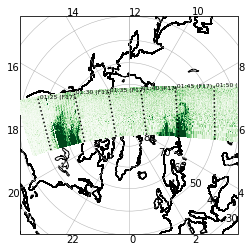

In [3]:
plot_date = inpTime#
fig = plt.figure()
ax = fig.add_subplot(
            projection='aacgmv2',\
            map_projection = cartopy.crs.NorthPolarStereo(),\
            coords="aacgmv2_mlt", plot_date=plot_date
            )
# add coastlines and lakes together!
ax.overaly_coast_lakes()
# plot set the map bounds
ax.set_extent([-180, 180, 40, 90], crs=cartopy.crs.PlateCarree())
# plot a SSUSI data!
fDict = ssObj.filter_data_by_time(inpTime, timeDelta=40., hemi="north")
ssObj.overlay_sat_data( fDict, ax, satList=["F17"],\
         inpTime=inpTime, vmin=0., vmax=2500.,\
        autoScale=False, coords="mlt",alpha=1.,
        crs=cartopy.crs.PlateCarree(), plotTitle=False)

# overaly gridlines!
plt_lons = numpy.arange( -180, 181, 30 )
mark_lons = numpy.arange( 0, 360, 30 )
plt_lats = numpy.arange(30,90,10)
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5)
gl.xlocator = mticker.FixedLocator(plt_lons)
gl.ylocator = mticker.FixedLocator(plt_lats)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.n_steps = 90
# mark the longitudes
ax.mark_latitudes(plt_lats, fontsize=10)
ax.mark_longitudes(lon_arr=mark_lons, fontsize=10)